# Creating Neural Networks with Tensorflow

CSC/DSC 340 Week 8 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 6, 2023

Last Modified: October 6, 2023

## Keras and Tensorflow
* Keras and Tensorflow use to be seperate libraries but Keras is now apart of Tensorflow
* In recent versions of Tensorflow, it has become hard to create and use neural networks without also using Keras
* However, there are a few features that are still useful

## Keras Neural Network With New Data Set
* MNIST Data Set
    * Input: images of handwritten digits (28x28 pixels)
    * Output: digit shown in the image
* We will go into more detail on image manipulation and classification when we cover neural networks, but we can do a preliminary analysis on the MNIST data set with regular neural networks.

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

## NOTE: The same data set is avaliable from Scikit-Learn

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print(len(train_images))

60000


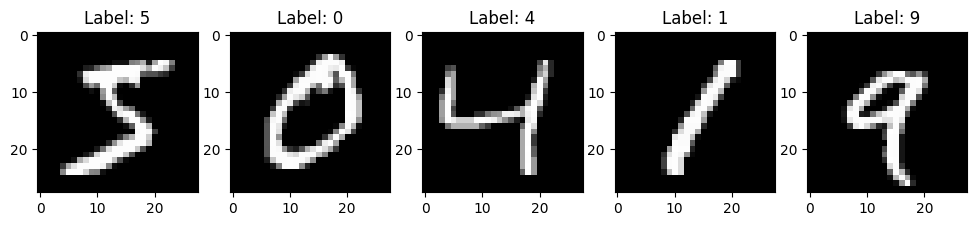

In [4]:
# Display a few sample images
num_samples = 5  # Change this to display a different number of images

plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")

plt.show()

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [6]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
np.shape(train_images[i])

(28, 28)

In [9]:
def mnist_classification_model ():
    # Define the model
    model = Sequential()

    # Add layers to the model
    model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 input images to a 1D vector
    model.add(Dense(128, activation='relu'))  # Fully connected layer with ReLU activation
    model.add(Dense(64, activation='relu'))   # Another fully connected layer with ReLU activation
    model.add(Dense(10, activation='softmax')) # Output layer with 10 neurons for 10 classes (digits 0-9)
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
mnist_model = mnist_classification_model ()

NameError: name 'Flatten' is not defined

In [41]:
history = mnist_model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 1s 835us/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1808 - val_accuracy: 0.9755
Epoch 2/10
1500/1500 [==============================] - 1s 828us/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.1679 - val_accuracy: 0.9751
Epoch 3/10
1500/1500 [==============================] - 1s 810us/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.1697 - val_accuracy: 0.9745
Epoch 4/10
1500/1500 [==============================] - 1s 808us/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.1896 - val_accuracy: 0.9735
Epoch 5/10
1500/1500 [==============================] - 1s 805us/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.1665 - val_accuracy: 0.9784
Epoch 6/10
1500/1500 [==============================] - 1s 808us/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.1901 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 1s 874us/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.1842 -

In [43]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 0s 464us/step - loss: 0.0953 - accuracy: 0.9721
Test accuracy: 97.21%


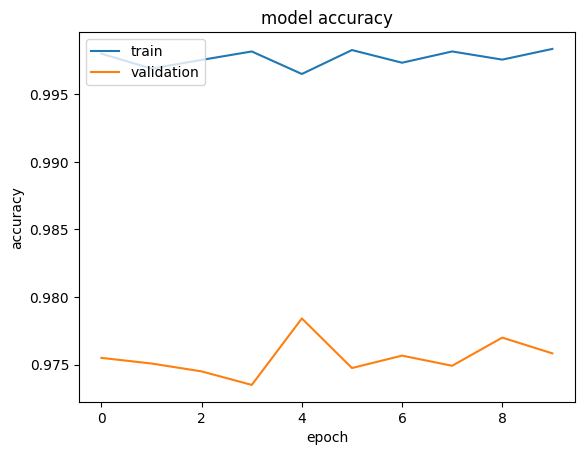

In [45]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Custom Loss Functions

## Tensorflow Variables

## GPU Support

## Preprocessing Layers

### Flatten Layer

### Normalization Layer

### CategoryEncoding Layer

### Image Preprocessing Layers

## Saving Trained Models

## Other Tensorflow Customizations

Tensorflow offers many other customizations besides the ones discussed here:
* Custom Activation Functions
* Custom Initialization Schemes
* Custom Layers
* Custom Training Loops

These are unlikely to be used in this course, but are good to know about for the future